# California Housing Regression

## What are we going to do?

> **Note**: This is a replication of the California Housing Regression example using the Task Module.

In this quick demo, we will use JAI to:

* Train and deploy models into a secure and scalable production-ready environment.

* Regression - Determine how each analyzed attribute influences the value of the house.

* Model inference - Predict the value of new houses and check the results.

---

## Importing Libraries

In [1]:
from jai import Trainer

---

## Dataset quick look

This dataset contains data collected by the 1990 U.S. Census concerning housing in the state of California. It contains data such as average number of rooms per dwelling per block group,  median income in block group and block group population, a block group being the smallest geographical unit per which the U.S. Census publishes data (typically an area ranging from 600-3000 in population). As the target, the dataset contains the median value of a house per block  group, expressed in hundreds of thousands of dollars.

In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_df = california_housing['frame']

# target is true median value of house per block group
california_df['price'] = california_housing.target

In [3]:
california_df.info()
# More information about what each column represents can be found on https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
 9   price        20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [4]:
# Showing first five rows of DataFrame
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


---

## Inserting data into Jai

To be able to use Jai's functionalities, we first need to turn the data into a Jai collection.
In this example, we'll use the Trainer module to send data to Jai.
We'll use the trainer.fit method to created the collection, which can then be consumed through the Query Module.
By using the fit method you add your raw data to your JAI environment, use the data to train your model based on the chosen model type and your model’s latent vector representation is then stored in the Jai collection.


Recognized fit arguments:
- db_type: Supervised
- label: 
  * task      : regression
  * label_name: price


Insert Data: 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]



Recognized fit arguments:
- db_type: Supervised
- label: 
  * task      : regression
  * label_name: price


JAI is working: 100%|██████████|22/22 [00:32]


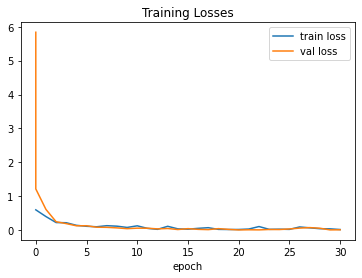


Setup Report:
Metrics Regression:
MAE: 0.03978196159005165
MSE: 0.003666582051664591
MAPE: 0.023322168737649918
R2 Score: 0.9972019559293164
Pinball Loss 0.5: 0.019890980795025826

Best model at epoch: 20 val_loss: 0.00


In [5]:
trainer = Trainer(
    # JAI collection name
    name = 'california_housing',

    #verbose 2 -> shows the loss graph at the end of training
    verbose = 2
)

trainer.set_parameters(
    #collection type
    db_type = 'Supervised',
    label =
    {
        'task':'regression',
        'label_name':'price'
    },
)

# When frequency_seconds >= 1, fit will return a Query object ready to consume the collection.
query = trainer.fit(
    #data to be processed - a Pandas DataFrame is expected
    data = california_df,

    # Overwrite allows you to overwrite other existing databases with the same name
    overwrite = True
)

---

## Model Inference

We can use the trained model for inference

In [7]:
# every JAI Supervised collection can be used for inference using query.predict()
ans = query.predict(
    # Remember to drop the label as it is not a feature!
    # Predicting the value of the first 5 houses in the dataset
    data = california_df.head(1).drop('price',axis = 1),
    as_frame = True
)

Predict Processing: 100%|██████████| 1/1 [00:00<00:00, 4169.29it/s]


In [8]:
ans['Target'] = california_housing.target
ans

,predict,Target
id,,
0,4.606207,4.526
